<a href="https://colab.research.google.com/github/Aditya2600/CNN-for-Medical-Diagnostic-/blob/main/CNN_for_Medical_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Input ,DepthwiseConv2D
from tensorflow.keras.layers import Conv2D , BatchNormalization
from tensorflow.keras.layers import ReLU , AvgPool2D , Flatten , Dense

from tensorflow.keras import Model

In [ ]:
def mobilnet_block(x, filters, strides):

  x = DepthwiseConv2D(kernel_size = 3, strides = strides, padding = 'same')(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = Conv2D(filters = filters, kernel_size = 1, strides = 1, padding = 'same')(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  return x

In [ ]:
input = Input(shape = (224, 224, 3))
x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)

In [ ]:
x = mobilnet_block(x, filters = 64, strides=1)
x = mobilnet_block(x, filters = 128, strides=2)
x = mobilnet_block(x, filters = 128, strides=1)
x = mobilnet_block(x, filters = 256, strides=2)
x = mobilnet_block(x, filters = 256, strides=1)
x = mobilnet_block(x, filters = 512, strides=2)
for _ in range (5):
  x = mobilnet_block(x, filters = 512, strides=1)
x = mobilnet_block(x, filters = 1024, strides=2)
x = mobilnet_block(x, filters = 1024, strides=1)
x = AvgPool2D(pool_size = 7, strides = 1, data_format='channels_first')(x)
output = Dense(units = 1000, activation = 'softmax')(x)
model = Model(inputs = input, outputs = output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 112, 112, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_27 (ReLU)                      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_13                  │ (None, 112, 112, 32)        │             320 │
│ (DepthwiseConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_28 (ReLU)                      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 112, 112, 64)        │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_29 (ReLU)                      │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_14                  │ (None, 56, 56, 64)          │             640 │
│ (DepthwiseConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_30 (ReLU)                      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 56, 56, 128)         │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_31 (ReLU)                      │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_15                  │ (None, 56, 56, 128)         │           1,280 │
│ (DepthwiseConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,258,808 (16.25 MB)

 Trainable params: 4,236,920 (16.16 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
import warnings
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.cm as cm
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
  print('Running on TPU ', tpu.master())
  strategy = tf.distribute.TPUStrategy(tpu)
except:
  strategy = tf.distribute.get_strategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

Number of replicas: 1


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

BATCH_SIZE = 32 * strategy.num_replicas_in_sync
IMAGE_SIZE = [224, 224]
CLASS_NAMES = ["NORMAL", "PNEUMONIA"]

In [ ]:
train_images = tf.data.TFRecordDataset(
    "gs://download.tensorflow.org/data/ChestXRay2017/train/images.tfrec"
)
train_paths = tf.data.TFRecordDataset(
    "gs://download.tensorflow.org/data/ChestXRay2017/train/paths.tfrec"
)
ds = tf.data.Dataset.zip((train_images, train_paths))

In [ ]:
COUNT_NORMAL = len([filename for filename in train_paths if "NORMAL" in filename.numpy().decode("utf-8")])
print(f"Normal images count in training set:" + str(COUNT_NORMAL))
COUNT_PNEUMONIA = len([filename for filename in train_paths if "PNEUMONIA" in filename.numpy().decode("utf-8")])
print(f"Pneumonia images count in training set:" + str(COUNT_PNEUMONIA))
print('Total Count of images:', COUNT_NORMAL+COUNT_PNEUMONIA)

Normal images count in training set:1349
Pneumonia images count in training set:3883
Total Count of images: 5232


In [ ]:
TRAIN_IMG_COUNT = COUNT_NORMAL + COUNT_PNEUMONIA

weight_for_0 = (1 / COUNT_NORMAL) * (TRAIN_IMG_COUNT) / 2.0
weight_for_1 = (1 / COUNT_PNEUMONIA) * (TRAIN_IMG_COUNT) / 2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.94
Weight for class 1: 0.67


In [ ]:
def get_label(file_path):
    parts = tf.strings.split(file_path, "/")
    return tf.cast(parts[-2] == "PNEUMONIA", tf.float32)  # Convert bool to float32

def decode_img(img):
  img = tf.image.decode_jpeg(img, channels=3)
  return tf.image.resize(img, IMAGE_SIZE)

def process_path(image, path):
    label = tf.cast(get_label(path), tf.float32)  # Convert label to float32
    img = decode_img(image)
    return img, label

ds = ds.map(process_path, num_parallel_calls = AUTOTUNE)

In [ ]:
ds = ds.shuffle(10000)
train_ds = ds.take(4300)
val_ds = ds.skip(4300)

In [ ]:
test_images = tf.data.TFRecordDataset(
    "gs://download.tensorflow.org/data/ChestXRay2017/test/images.tfrec"
)
test_paths = tf.data.TFRecordDataset(
    "gs://download.tensorflow.org/data/ChestXRay2017/test/paths.tfrec"
)
COUNT_NORMAL = len([filename for filename in test_paths if "NORMAL" in filename.numpy().decode("utf-8")])
COUNT_PNEUMONIA = len([filename for filename in test_paths if "PNEUMONIA" in filename.numpy().decode("utf-8")])
print(f"Normal images count in test set:" + str(COUNT_NORMAL))
print(f"Pneumonia images count in test set:" + str(COUNT_PNEUMONIA))
print('Total Count of images:', COUNT_NORMAL+COUNT_PNEUMONIA)

Normal images count in test set:234
Pneumonia images count in test set:390
Total Count of images: 624


In [ ]:
test_ds = tf.data.Dataset.zip((test_images, test_paths))

test_ds = test_ds.map(process_path, num_parallel_calls = AUTOTUNE)
test_ds_batch = test_ds.batch(BATCH_SIZE)

In [ ]:
def prepare_for_training(ds, cache=True):
  ds = ds.cache()
  ds = ds.batch(BATCH_SIZE)

  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

In [ ]:
train_ds_batch = prepare_for_training(train_ds)
val_ds_batch = prepare_for_training(val_ds)

image_batch, label_batch = next(iter(train_ds_batch))

In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
    ax = plt.subplot(5, 5, n+1)
    plt.imshow(image_batch[n]/255)
    if label_batch[n]:
      plt.title("PNEUMONIA")
    else:
      plt.title("NORMAL")
    plt.axis("off")

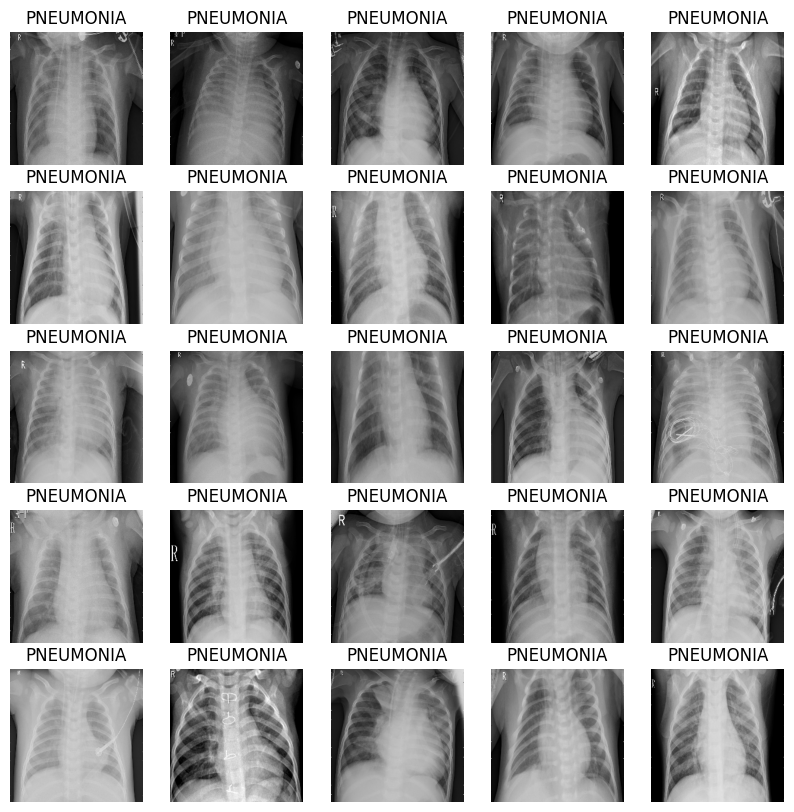

In [ ]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [ ]:
def build_model():

  mobilenet_model = tf.keras.applications.MobileNetV2(
      input_shape = (224, 224, 3),
      include_top = False,
      weights = 'imagenet'
  )

  for layer in mobilenet_model.layers[:-2]:
    layer.trainable = False

  x = mobilenet_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dense(128, activation = 'relu')(x)
  output = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
  pretrained_model = tf.keras.Model(inputs = mobilenet_model.input, outputs = output)
  return pretrained_model

In [ ]:
finetuned_model = build_model()
finetuned_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 166,657 (651.00 KB)

 Non-trainable params: 2,255,424 (8.60 MB)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("xray_model.keras", save_best_only = True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience = 10, restore_best_weights = True
    )

In [ ]:
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1 **(epoch / s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 100000,
    decay_rate = 0.96,
    staircase = True
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

# Correctly define the optimizer with the learning rate scheduler
with strategy.scope():
    finetuned_mobilenet = build_model()
    METRICS = [
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
    ]
    finetuned_mobilenet.compile(
        loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_schedule),  # Pass lr_schedule here
        metrics=METRICS,
    )

    history = finetuned_mobilenet.fit(
        train_ds_batch,
        epochs=10,
        validation_data=val_ds_batch,
        class_weight=class_weight,
        callbacks=[checkpoint_cb, early_stopping_cb],  # lr_scheduler not needed here
    )

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 660s 4s/step - binary_accuracy: 0.8010 - loss: 2.1040 - precision: 0.9168 - recall: 0.8077 - val_binary_accuracy: 0.8884 - val_loss: 0.2683 - val_precision: 0.9850 - val_recall: 0.8615
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - binary_accuracy: 0.9050 - loss: 0.2260 - precision: 0.9708 - recall: 0.9007 - val_binary_accuracy: 0.9045 - val_loss: 0.1999 - val_precision: 0.8985 - val_recall: 0.9810
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - binary_accuracy: 0.9230 - loss: 0.1902 - precision: 0.9789 - recall: 0.9174 - val_binary_accuracy: 0.9249 - val_loss: 0.1793 - val_precision: 0.9477 - val_recall: 0.9504
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - binary_accuracy: 0.9340 - loss: 0.1675 - precision: 0.9812 - recall: 0.9299 - val_binary_accuracy: 0.9356 - val_loss: 0.1654 - val_precision: 0.9617 - val_recall: 0.9504
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - binary_accuracy: 0.9422 - loss: 0.1382 - prec

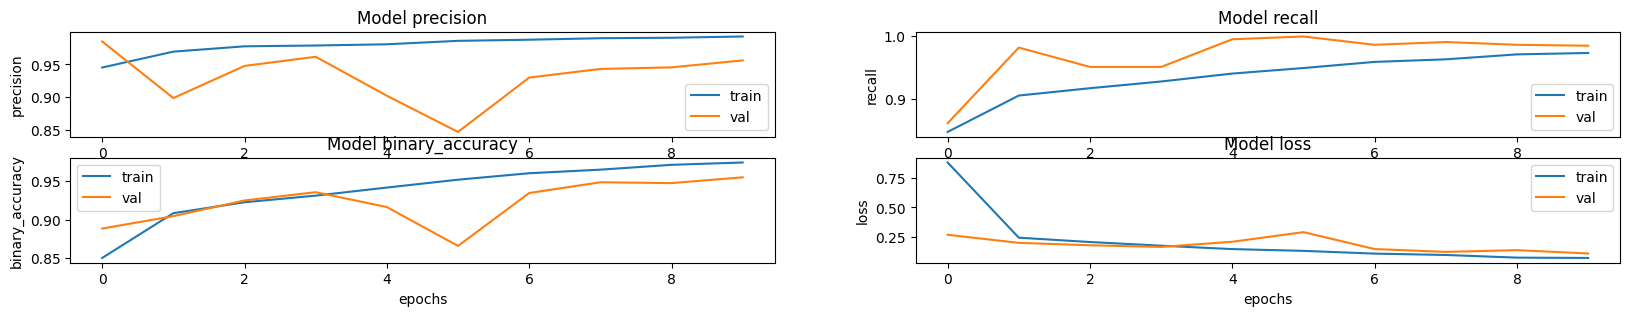

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(["precision", "recall", "binary_accuracy", "loss"]):
  ax[i].plot(history.history[met])
  ax[i].plot(history.history["val_" + met])
  ax[i].set_title("Model {}".format(met))
  ax[i].set_xlabel("epochs")
  ax[i].set_ylabel(met)
  ax[i].legend(["train", "val"])

In [ ]:
loaded_mobilenet = tf.keras.models.load_model("xray_model.keras")

In [ ]:
loaded_mobilenet.evaluate(test_ds_batch, return_dict = True)

20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - binary_accuracy: 0.5389 - loss: 2.5166 - precision: 0.3569 - recall: 0.6578


{'binary_accuracy': 0.7467948794364929,
 'loss': 1.348870038986206,
 'precision': 0.714022159576416,
 'recall': 0.9923076629638672}

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
This image is 60.18 percent NORMAL
This image is 39.82 percent PNEUMONIA
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 30 µs


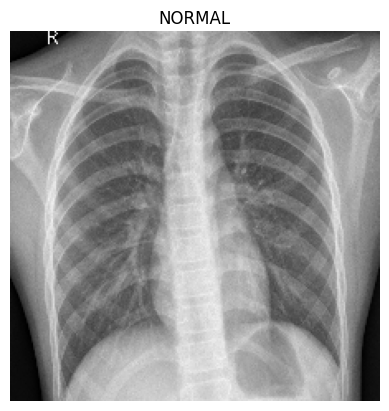

In [ ]:
for image, label in test_ds_batch.take(2):
  plt.imshow(image[2] / 255.0)
  plt.title(CLASS_NAMES[int(label[2].numpy())]) # Convert label to int
  plt.axis('off')
prediction = finetuned_mobilenet.predict(test_ds_batch.take(2))[2]
scores = [1 - prediction, prediction]
for score, name in zip(scores, CLASS_NAMES):
  print("This image is %.2f percent %s" % ((100 * score), name))
%time

In [ ]:
label_list = []
prediction_list = []

for image, label, in test_ds:
  image = tf.expand_dims(image, axis = 0)
  prediction = finetuned_mobilenet.predict(image)
  label = tf.cast(label, tf.int32)

  if prediction > 0.5:
    prediction = 1
  else:
    prediction = 0

  label_list.append(label)
  prediction_list.append(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

In [ ]:
test_confusion_matrix = tf.math.confusion_matrix(
    label_list,
    prediction_list
)

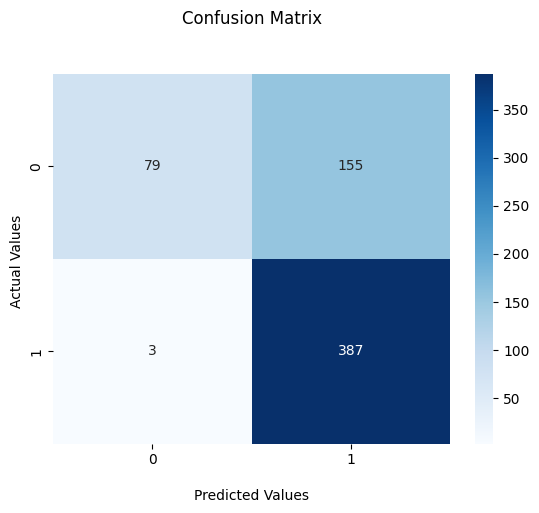

In [ ]:
ax = sns.heatmap(test_confusion_matrix, annot = True, cmap = 'Blues', fmt = 'g')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [32]:
for i in range(len(finetuned_mobilenet.layers)):
    layer = finetuned_mobilenet.layers[i]
    if 'conv' not in layer.name:
      continue
    print(i, layer.name, layer.output.shape)

4 expanded_conv_depthwise (None, 112, 112, 32)
5 expanded_conv_depthwise_BN (None, 112, 112, 32)
6 expanded_conv_depthwise_relu (None, 112, 112, 32)
7 expanded_conv_project (None, 112, 112, 16)
8 expanded_conv_project_BN (None, 112, 112, 16)


In [33]:
last_conv_layer_name = finetuned_mobilenet.layers[8].name
last_conv_layer_name

'expanded_conv_project_BN'

In [34]:
!pip install tf-explain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.9 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
This image is 60.18 percent NORMAL
This image is 39.82 percent PNEUMONIA


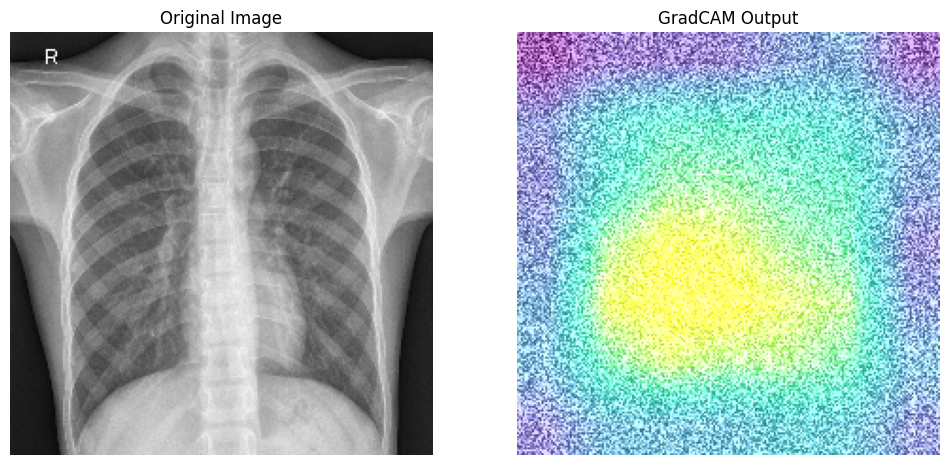

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
This image is 79.37 percent NORMAL
This image is 20.63 percent PNEUMONIA


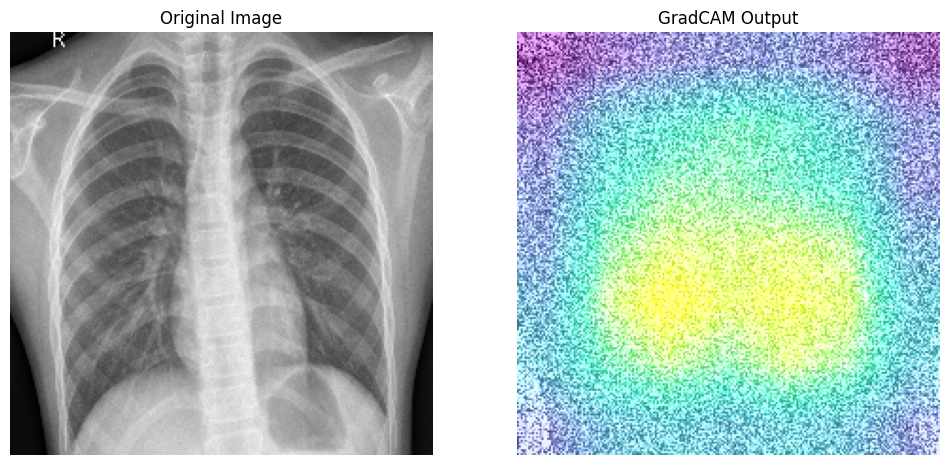

In [43]:
from tf_explain.core.grad_cam import GradCAM
import numpy as np
import matplotlib.pyplot as plt

for image_batch, label_batch in test_ds_batch.take(2):  # Take a batch from test_ds
    image = image_batch[2].numpy()  # Select the 3rd image from the batch
    label = label_batch[2].numpy()  # Corresponding label

    # Normalize the image for visualization
    normalized_image = image / 255.0

    # Expand dimensions to match model input shape (1, 224, 224, 3)
    input_image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Get prediction
    prediction = finetuned_mobilenet.predict(input_image)[0][0]  # Predict on single image
    scores = [1 - prediction, prediction]

    for score, name in zip(scores, CLASS_NAMES):
        print(f"This image is {100 * score:.2f} percent {name}")

    # Initialize GradCAM and specify the last Conv2D layer
    explainer = GradCAM()
    grid = explainer.explain(
        (input_image, None),  # Pass image input correctly here
        finetuned_mobilenet,
        class_index=int(prediction > 0.5),  # Class index based on prediction
        layer_name="block_16_project"  # Replace with the correct Conv2D layer name
    )

    # Visualization
    f, axarr = plt.subplots(1, 2, figsize=(12, 6))
    axarr[0].imshow(normalized_image)
    axarr[0].set_title("Original Image")
    axarr[0].axis("off")

    axarr[1].imshow(grid)
    axarr[1].set_title("GradCAM Output")
    axarr[1].axis("off")

    plt.show()

In [44]:
with strategy.scope():
  pretrained_model = tf.keras.applications.EfficientNetB6(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
  pretrained_model.trainable = True

  model = tf.keras.Sequential([
      tf.keras.layers.Lambda(lambda x: tf.keras.applications.efficientnet.preprocess_input(x), input_shape=(224, 224, 3)),
      pretrained_model,
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dense(2, activation='softmax', name='flower_prob')
  ])


165234480/165234480 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
